In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

data = pd.read_csv('../input/obesity-among-adults-by-country-19752016/obesity-cleaned.csv')
data['Obesity_percentage'] = data.iloc[:,3].copy()
data.drop(['Unnamed: 0','Obesity (%)'], axis=1, inplace=True)
data['Obesity_range'] = data['Obesity_percentage'].str.split().str[1]
data['Obesity_percentage'] = data['Obesity_percentage'].str.split().str[0]
data['Obesity_percentage'] = data['Obesity_percentage'].str.replace('No','0.0')
data['Obesity_percentage'] = data['Obesity_percentage'].astype('float')

# Comparing male and female obesity percentages in Asian Countries

In [2]:
df = data[data.Country.isin(['India','China','Japan','Bangladesh','Sri Lanka','Pakistan','Afghanistan'])]
df = df[df.Sex.isin(['Male','Female'])]
df = df[df.Year > 1990.0]
fig = px.bar(df, x="Country", y="Obesity_percentage", color='Sex', barmode='group', animation_frame="Year", 
           animation_group="Country", hover_name="Country",range_y=[0,12])
fig.update_layout(title='Comparing male and female obesity percentages in Asian Countries')
fig.show()

Somethings I observed from the above plot
1. Japan is the only country where males have higher obesity percentage than females
2. Obesity growth rate is highest in Pakistan and Afghanistan
3. Obesity growth rate is lowest in Bangladesh and India
4. Bangladesh has the lowest male obesity percentage (2.3)
5. Japan has the lowest female obesity percentage (3.7)

# Which country have the highest obesity percentage? ---> Nauru

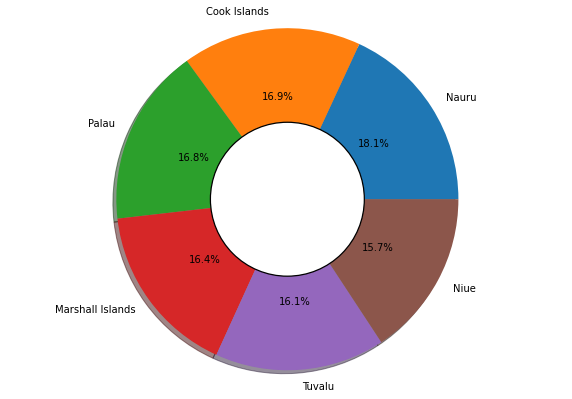

In [3]:
country = data.loc[:,['Country','Obesity_percentage']]
country['max_obesity'] = country.groupby('Country')['Obesity_percentage'].transform('max')
country.drop('Obesity_percentage', axis=1, inplace=True)
country = country.drop_duplicates().sort_values('max_obesity', ascending=False).head(6)

fig = plt.figure(figsize=(10,7))
plt.pie(country['max_obesity'], labels=country['Country'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

# Comparing obesity growth rate western and eastern countries

In [4]:
selected_countries = ['India', 'United States of America', 'Japan', 'China', 'United Kingdom of Great Britain and Northern Ireland']
perc = data.loc[:,["Year","Country",'Obesity_percentage']]
perc['max_obesity'] = perc.groupby([perc.Country,perc.Year])['Obesity_percentage'].transform('max')
perc.drop('Obesity_percentage', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.loc[perc['Country'].isin(selected_countries)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Country', y="max_obesity", animation_frame="Year", 
           animation_group="Country", color="Country", hover_name="Country", range_y=[0,40])
fig.show()

Growth rate of obesity in the western countries is a lot higher than the eastern countries.

# Which year saw the highest obesity percentage? ---> 2016

In [5]:
year = data.loc[:,['Year','Obesity_percentage']]
year['max_obesity'] = year.groupby('Year')['Obesity_percentage'].transform('max')
year.drop('Obesity_percentage', axis=1, inplace=True)
year = year.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(year, names='Year', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.05,0.07,0.05,0.08,0.05], textinfo="percent+label")
fig.show()

# Yearwise plot for max obesity percentage ---> Linearly increasing graph

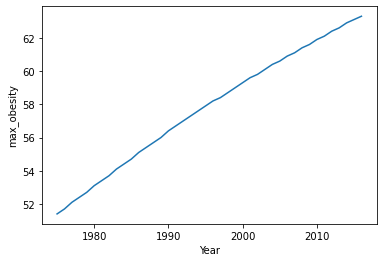

In [6]:
year = data.loc[:,['Year','Obesity_percentage']]
year['max_obesity'] = year.groupby('Year')['Obesity_percentage'].transform('max')
year.drop('Obesity_percentage', axis=1, inplace=True)
year = year.drop_duplicates().sort_values('Year')

sns.lineplot(data=year, x='Year', y='max_obesity')

# Which country saw max obesity percentage for males? ---> Nauru

In [7]:
male = data.loc[data['Sex']=='Male', ['Country','Obesity_percentage']]
male['max_obesity'] = male.groupby('Country')['Obesity_percentage'].transform('max')
male.drop('Obesity_percentage', axis=1, inplace=True)
male = male.drop_duplicates().sort_values('max_obesity', ascending=False).head()

fig = px.pie(male, names='Country', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.05,0.06,0.03,0.08], textinfo="percent+label")
fig.show()

# Which country saw max obesity percentage for females? ---> Nauru

In [8]:
female = data.loc[data['Sex']=='Female', ['Country','Obesity_percentage']]
female['max_obesity'] = female.groupby('Country')['Obesity_percentage'].transform('max')
female.drop('Obesity_percentage', axis=1, inplace=True)
female = female.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(female, names='Country', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Selecting 5 countries with highest obesity percentages

In [9]:
country = data.loc[:,['Country','Obesity_percentage']]
country['max_obesity'] = country.groupby('Country')['Obesity_percentage'].transform('max')
country.drop('Obesity_percentage', axis=1, inplace=True)
country = country.drop_duplicates().sort_values('max_obesity', ascending=False)
top_5_countries = country['Country'].head(5).tolist()
top_5_countries

['Nauru', 'Cook Islands', 'Palau', 'Marshall Islands', 'Tuvalu']

# Top 5 countries per year

In [10]:
perc = data.loc[:,["Year","Country",'Obesity_percentage']]
perc['max_obesity'] = perc.groupby([perc.Country,perc.Year])['Obesity_percentage'].transform('max')
perc.drop('Obesity_percentage', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.loc[perc['Country'].isin(top_5_countries)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Country', y="max_obesity", animation_frame="Year", 
           animation_group="Country", color="Country", hover_name="Country", range_y=[0,70])
fig.show()

It can be clearly noticed that the growth rate of obesity percentage in Palau, Cook Islands and Marshall Islands are a lot higher than Nauru despite it being the 1st one in the list.

# Which obesity range does most countries belong to? ---> [0.1-1.0]

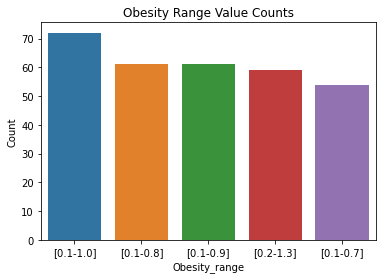

In [11]:
obrange = data['Obesity_range'].value_counts().reset_index()
obrange = obrange.sort_values('Obesity_range', ascending=False)
obrange = obrange[1:6]

sns.barplot(data=obrange, x='index', y='Obesity_range')
plt.title('Obesity Range Value Counts')
plt.xlabel('Obesity_range')
plt.ylabel('Count')
plt.show()

# Distribution of Obesity Percentages ---> (0-5) dense

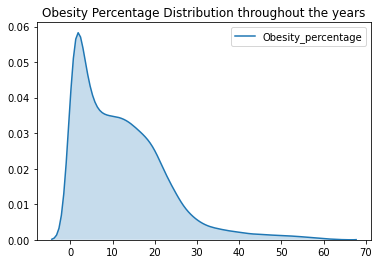

In [12]:
sns.kdeplot(data=data['Obesity_percentage'], label='Obesity_percentage', shade=True)
plt.title('Obesity Percentage Distribution throughout the years')
plt.show()

# Comparing male and female obesity percentages in North American Countries

In [13]:
df = data[data.Country.isin(['United States of America','Canada','Mexico','Guatemala','Cuba','Haiti','Honduras'])]
df = df[df.Sex.isin(['Male','Female'])]
df = df[df.Year > 1990.0]
fig = px.bar(df, x="Country", y="Obesity_percentage", color='Sex', barmode='group', animation_frame="Year", 
           animation_group="Country", hover_name="Country",range_y=[3,38])
fig.update_layout(title='Comparing male and female obesity percentages in North American Countries')
fig.show()

# Comparing male and female obesity percentages in European Countries

In [14]:
df = data[data.Country.isin(['Ukraine','Spain','Sweden','Norway','France','Germany','Finland'])]
df = df[df.Sex.isin(['Male','Female'])]
df = df[df.Year > 1990.0]
fig = px.bar(df, x="Country", y="Obesity_percentage", color='Sex', barmode='group', animation_frame="Year", 
           animation_group="Country", hover_name="Country",range_y=[3,38])
fig.update_layout(title='Comparing male and female obesity percentages in European Countries')
fig.show()